In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("Concrete_Data.csv")
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [3]:
data.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.tail(6)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1024,166.0,259.7,0.0,183.2,12.7,858.8,826.8,28,37.92
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [5]:
data.keys()

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
df=pd.DataFrame(data)

In [11]:
df.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


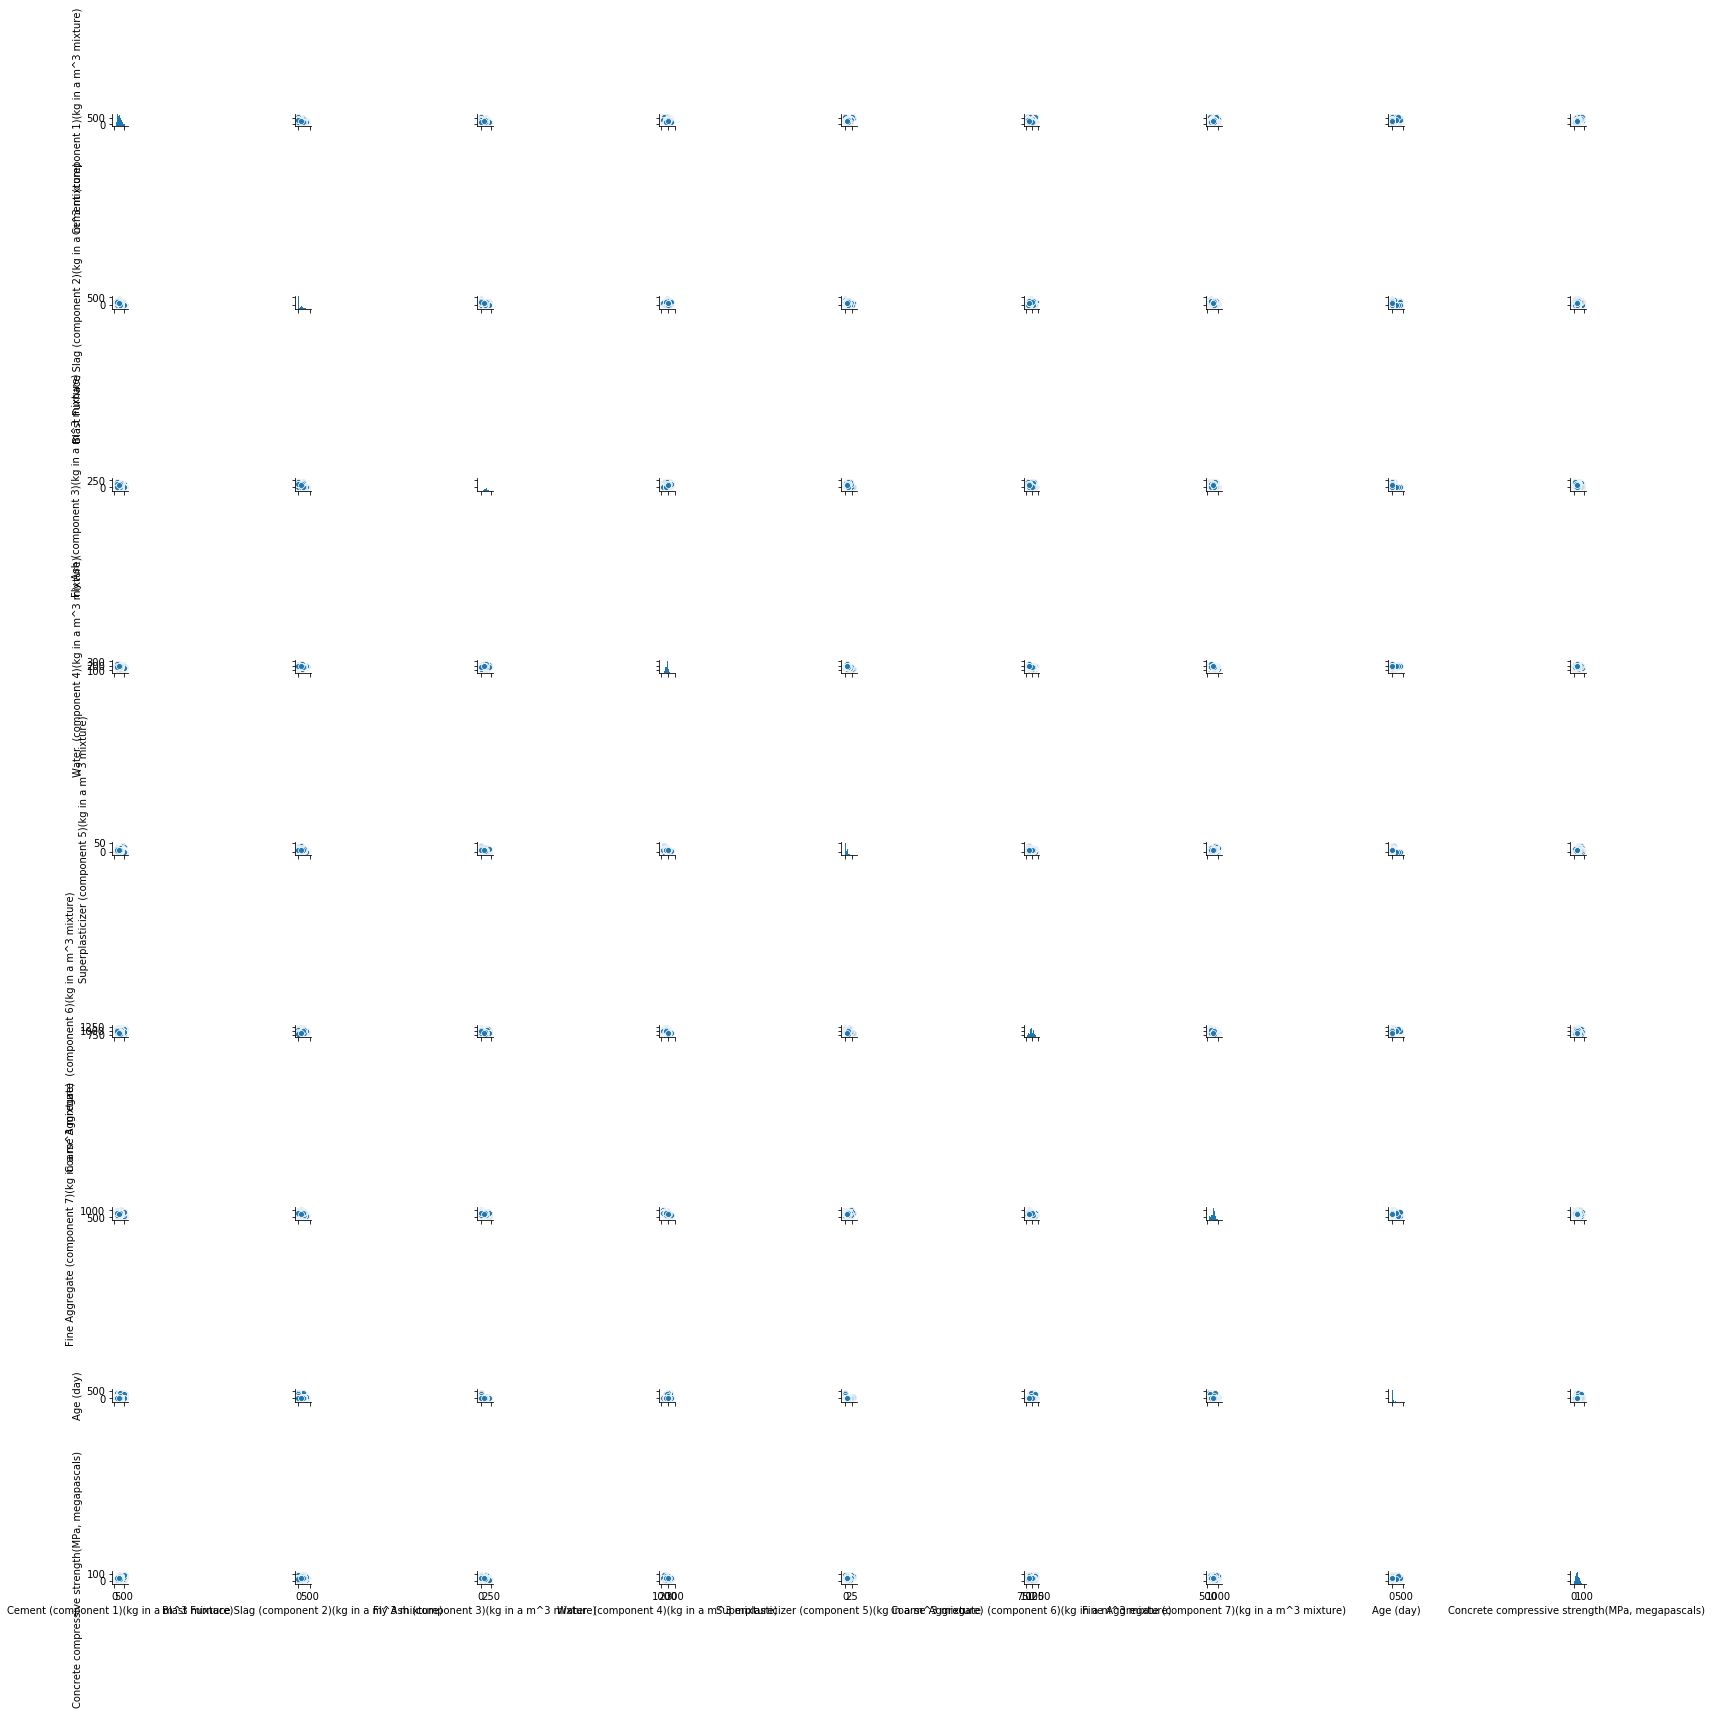

In [14]:
sns.pairplot(df)

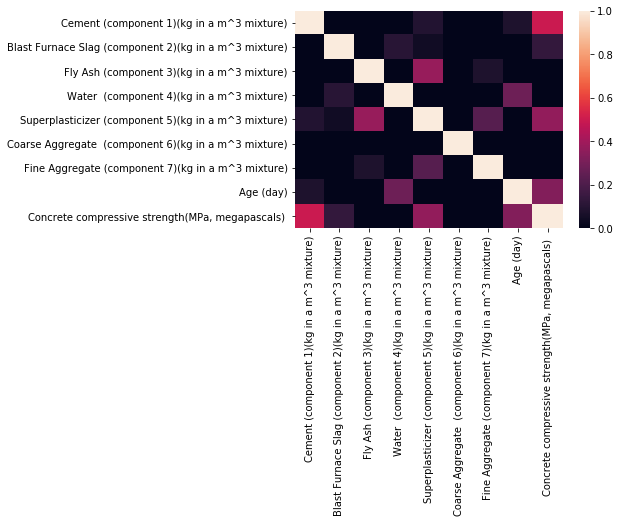

In [15]:
corr=df.corr()
ax=sns.heatmap(corr,vmin=0,vmax=1)

In [8]:
df.keys()

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [9]:
x_data=df.iloc[:,:8]
x_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28


In [10]:
y_target=df.iloc[:,-1]
y_target

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
5       47.03
6       43.70
7       36.45
8       45.85
9       39.29
10      38.07
11      28.02
12      43.01
13      42.33
14      47.81
15      52.91
16      39.36
17      56.14
18      40.56
19      42.62
20      41.84
21      28.24
22       8.06
23      44.21
24      52.52
25      53.30
26      41.15
27      52.12
28      37.43
29      38.60
        ...  
1000    44.61
1001    53.52
1002    57.22
1003    65.91
1004    52.83
1005    33.40
1006    18.03
1007    37.36
1008    35.31
1009    42.64
1010    40.06
1011    43.80
1012    61.24
1013    40.87
1014    33.31
1015    52.43
1016    15.09
1017    38.46
1018    37.27
1019    35.23
1020    42.14
1021    31.88
1022    41.54
1023    39.46
1024    37.92
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

In [92]:
print('x_data =',x_data.shape)

print('y_target=',y_target.shape)


x_data = (1030, 8)
y_target= (1030,)


In [93]:
y=y_target.values.reshape(-1,1)
y

array([[79.99],
       [61.89],
       [40.27],
       ...,
       [23.7 ],
       [32.77],
       [32.4 ]])

In [94]:
y.shape

(1030, 1)

USING LOGISTIC REGRESSION NOW

In [95]:
train_x,test_x,train_y,test_y=train_test_split(x_data,y, test_size=0.30,random_state=45)

In [96]:
print('train_x=',train_x.shape)
print('train_y=',train_y.shape)
print('test_x=',test_x.shape)
print('test_y=',test_y.shape)

train_x= (721, 8)
train_y= (721, 1)
test_x= (309, 8)
test_y= (309, 1)


In [97]:
lr=LinearRegression()

lr.fit(train_x,train_y)
lr.score(train_x,train_y)


0.6241401500534327

In [98]:
y_pred=lr.predict(test_x)

In [99]:
ls=Lasso()

ls.fit(train_x,train_y)
ls.score(train_x,train_y)

0.6239155839331334

In [100]:
Rg=Ridge()

Rg.fit(train_x,train_y)
Rg.score(train_x,train_y)

0.6241401500255044